<a href="https://colab.research.google.com/github/aebongbing/ESAA/blob/main/3_15_%EB%AA%A8%EB%8D%B8%ED%9B%88%EB%A0%A8_%EC%84%B8%EC%85%98_%EC%97%B0%EC%8A%B5%EB%AC%B8%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **| 모델 훈련 연습 문제**
___
- 출처 : 핸즈온 머신러닝 Ch04 연습문제 1, 5, 9, 10
- 개념 문제의 경우 텍스트 셀을 추가하여 정답을 적어주세요.

### **1. 수백만 개의 특성을 가진 훈련 세트에서는 어떤 선형 회귀 알고리즘을 사용할 수 있을까요?**
___


확률적 경사 하강법, 미니배치 경사 하강법, 훈련세트 메모리 크기 맞으면 배치 경사 하강법도 가능

### **2. 배치 경사 하강법을 사용하고 에포크마다 검증 오차를 그래프로 나타내봤습니다. 검증 오차가 일정하게 상승되고 있다면 어떤 일이 일어나고 있는 걸까요? 이 문제를 어떻게 해결할 수 있나요?**
___

학습율이 너무 높아 알고리즘이 발산하고 있는 것, 학습율을 낮추어야 함

### **3. 릿지 회귀를 사용했을 때 훈련 오차가 검증 오차가 거의 비슷하고 둘 다 높았습니다. 이 모델에는 높은 편향이 문제인가요, 아니면 높은 분산이 문제인가요? 규제 하이퍼파라미터 $\alpha$를 증가시켜야 할까요 아니면 줄여야 할까요?**
___

과소적합된 경우(편향된 경우)이기 때문에 규제 하이퍼파라미터를 감소시켜야 *함*

### **4. 다음과 같이 사용해야 하는 이유는?**
___
- 평범한 선형 회귀(즉, 아무런 규제가 없는 모델) 대신 릿지 회귀
- 릿지 회귀 대신 라쏘 회귀
- 라쏘 회귀 대신 엘라스틱넷

1. 규제 없는 게 성능이 더 좋음
2. 라쏘는 주요한 몇 개의 특성을 제외하고 가중치를 0으로 만들기 때문에 주요한 특성 몇 개만 살펴보고 싶을때 릿지보다 유용함
3. 라쏘는 불규칙해서

### **추가) 조기 종료를 사용한 배치 경사 하강법으로 iris 데이터를 활용해 소프트맥스 회귀를 구현해보세요(사이킷런은 사용하지 마세요)**


---



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


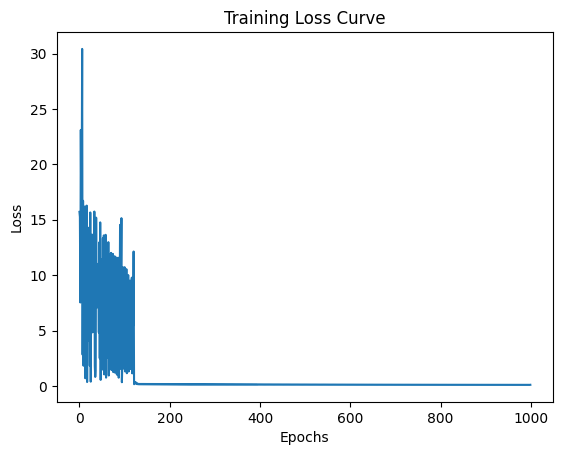

Test Accuracy: 0.9


In [4]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

# Load iris dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

# One-hot encode the target variable
encoder = OneHotEncoder(sparse=False)
y_one_hot = encoder.fit_transform(y)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

# Add bias term to input features
X_train_bias = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_bias = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# Define softmax function
def softmax(logits):
    exp_logits = np.exp(logits)
    return exp_logits / np.sum(exp_logits, axis=1, keepdims=True)

# Define cross-entropy loss function
def cross_entropy_loss(y_true, y_pred):
    m = y_true.shape[0]
    loss = -1/m * np.sum(y_true * np.log(y_pred))
    return loss

# Initialize weights
np.random.seed(42)
n_features = X_train_bias.shape[1]
n_classes = y_train.shape[1]
weights = np.random.randn(n_features, n_classes)

# Hyperparameters
learning_rate = 0.01
epochs = 1000
tolerance = 1e-4
prev_loss = np.inf

# Training loop
losses = []
for epoch in range(epochs):
    logits = np.dot(X_train_bias, weights)
    y_pred = softmax(logits)

    loss = cross_entropy_loss(y_train, y_pred)
    losses.append(loss)

    # Calculate gradient
    error = y_pred - y_train
    gradient = np.dot(X_train_bias.T, error)

    # Update weights
    weights -= learning_rate * gradient

    # Check for early stopping
    if abs(prev_loss - loss) < tolerance:
        print(f"Converged at epoch {epoch}")
        break
    prev_loss = loss

# Plot loss curve
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.show()

# Evaluate on test set
test_logits = np.dot(X_test_bias, weights)
test_pred_probs = softmax(test_logits)
test_pred_labels = np.argmax(test_pred_probs, axis=1)

accuracy = np.mean(test_pred_labels == np.argmax(y_test, axis=1))
print(f"Test Accuracy: {accuracy}")